# 3.4 영화 리뷰 분류: 이진 분류 예제

## 3.4.1 IMDB 데이터셋

In [1]:
# IMDB 데이터셋 로드하기
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


## 3.4.2 데이터 준비

In [0]:
# 정수 시퀀스를 이진 행렬로 인코딩하기
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))  # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬로 만듭니다
  for i , sequences in enumerate(sequences):
    results[i, sequences] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
  return results

x_train = vectorize_sequences(train_data)   # 훈련 데이터를 벡터로 변환
x_test = vectorize_sequences(test_data)   # 테스트 데이터를 벡터로 변환

y_train = np.asarray(train_labels).astype('float32')
y_test= np.asarray(test_labels).astype('float32')

## 3.4.3 신경망 모델 만들기

In [0]:
# 모델 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# 옵티마이저 설정하기
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# 손실과 측정을 함수 객체로 지정하기
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=[metrics.binary_accuracy])

## 3.4.4 훈련 검증

In [0]:
# 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
# 모델 훈련하기
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5998 - acc: 0.5937 - val_loss: 0.5264 - val_acc: 0.7858
Epoch 2/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.4617 - acc: 0.8491 - val_loss: 0.4383 - val_acc: 0.8862
Epoch 3/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.3308 - acc: 0.9179 - val_loss: 0.3233 - val_acc: 0.8885
Epoch 4/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.2279 - acc: 0.9341 - val_loss: 0.2895 - val_acc: 0.8902
Epoch 5/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1712 - acc: 0.9512 - val_loss: 0.2886 - val_acc: 0.8868
Epoch 6/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.1352 - acc: 0.9626 - val_loss: 0.3035 - val_acc: 0.8813
Epoch 7/20
15000/15000 [==============================] - 2s 143us/step - loss: 0.1112 - acc: 0.9697 - val_loss: 0.3064 - 

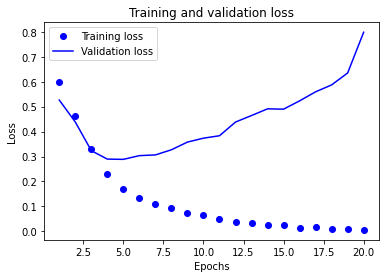

In [24]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  # 'bo'는 파란색점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')  # 'b'는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

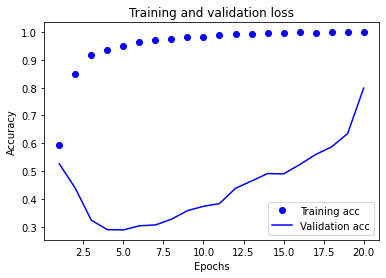

In [25]:
# 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_loss']

plt.plot(epochs, acc, 'bo', label='Training acc')  # 'bo'는 파란색점을 의미
plt.plot(epochs, val_acc, 'b', label='Validation acc')  # 'b'는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
# 모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.4599 - accuracy: 0.8160
Epoch 2/4
25000/25000 [==============================] - 2s 91us/step - loss: 0.2588 - accuracy: 0.9129
Epoch 3/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.2026 - accuracy: 0.9279
Epoch 4/4
25000/25000 [==============================] - 2s 61us/step


In [28]:
results

[0.2983540804672241, 0.8815199732780457]

## 3.4.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [29]:
model.predict(x_test)

array([[0.13954568],
       [0.9986868 ],
       [0.76239824],
       ...,
       [0.10513476],
       [0.05462369],
       [0.586875  ]], dtype=float32)